In [ ]:
# Import required modules
import pandas as pd
import glob2 # Finds all path names that match a specific pattern
# from openpyxl import load_workbook
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [ ]:
# Specify paths to files
master_path = r'C:\Users\MT1070\Desktop\Master Call Volume' #\pilot-extracts'

# Display names of files in folder
file_names = glob2.glob(master_path + "/*.xlsx")

# Initialize an empty data frame to store data from all files
final_sheet = pd.DataFrame()

In [ ]:
# Iteratively read data extracts and append them to the final DataFrame
for file in file_names:
    try:
        df = pd.read_excel(file, sheet_name=None, skipfooter=2, engine='openpyxl')
        df_concat = pd.concat(df.values(), ignore_index=True, sort=False)
        final_sheet = final_sheet.append(df_concat, ignore_index=True)
    except Exception as e:
        print(f"Error occurred while processing file: {file}")
        print(str(e))

In [ ]:
# Combine data into a new Excel file
master_file_path = r"C:\Users\MT1070\Desktop\Master Call Volume\SpinSci Call Volume Evaluation.xlsx"
final_sheet.to_excel(master_file_path, sheet_name='Raw Data', index=False)

In [ ]:
# final_sheet.head()

In [ ]:
# Specify paths to files
file_path = r'C:\Users\MT1070\Desktop\Master Call Volume\SpinSci Call Volume Evaluation.xlsx'

# Read file and skip the first row
df = pd.read_excel(file_path, skiprows=[0])

In [17]:
# Reformat date col and Remove rows where "date" is present in the "date" column
# data = df[~df['date'].str.contains('date', case=False, na=False)]
data = df[~df['date'].str.contains('date', case=False, na=False)]
data['date'] = pd.to_datetime(data['date'], format='%m/%d/%y', errors='coerce', exact=False, infer_datetime_format=True)

# data['date'] = pd.to_datetime(data['date'], format='%m/%d/%y', errors='coerce', exact=False, infer_datetime_format=True).dt.date

# Filter the data to include only dates within the year 2023
# data.loc[data['date'].dt.year != 2023, 'date'] = data.loc[data['date'].dt.year != 2023, 'date'].apply(lambda x: x.replace(year=2023))
data = data[data['date'].dt.year == 2023]

# Extract the date component without the time slot
data['date'] = data['date'].dt.date

# Group the data set based on calendar date
filtered_data = data.groupby("date").sum()

# Reset index to use data col
filtered_data = filtered_data.reset_index()
filtered_data.head()

C:\Users\MT1070\AppData\Local\Temp\ipykernel_21228\2197245399.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['date'] = pd.to_datetime(data['date'], format='%m/%d/%y', errors='coerce', exact=False, infer_datetime_format=True)
C:\Users\MT1070\AppData\Local\Temp\ipykernel_21228\2197245399.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['date'] = data['date'].dt.date


,date,total_internal_calls,total_external_calls,total_english_calls,total_spanish_calls,total_option1_selected,total_option2_selected,total_option3_selected,total_option4_selected,total_option5_selected,total_unique_calls,total_calls_transfered,total_max_ninm_calls,total_calls_during_non_peak,total_calls_during_peak,total_hangup_calls,total_max_ni_calls,total_max_nm_calls
0,2023-03-07,406,2384,2032,32,681,593,326,58,13,1840,1884,42,378,2412,0,38,4
1,2023-03-08,452,2354,1949,34,664,544,343,58,11,1931,1844,32,460,2346,0,29,3
2,2023-03-09,39,138,112,0,23,20,58,1,0,117,114,1,177,0,0,0,1
3,2023-03-10,415,2366,1986,25,617,593,363,50,10,1865,1853,34,390,2391,0,28,6
4,2023-03-11,164,808,684,6,126,215,240,32,4,661,700,10,339,633,0,10,0


In [18]:
# Create column by weekday
filtered_data['weekday'] = filtered_data['date'].dt.dayofweek

AttributeError: Can only use .dt accessor with datetimelike values

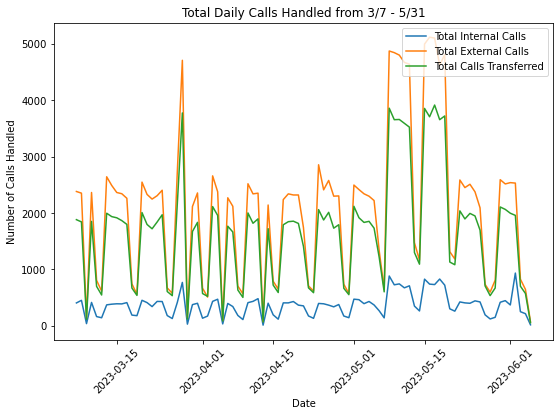

In [19]:
# Plotting internal, external, and call transfers call volumes overlayed
# Creating subplots
fig, axes = plt.subplots(figsize=(8, 6))

# Plotting the first subplot
line1, = axes.plot(filtered_data['date'], filtered_data['total_internal_calls'], label='Total Internal Calls')
line2, = axes.plot(filtered_data['date'], filtered_data['total_external_calls'], label='Total External Calls') 
line3, = axes.plot(filtered_data['date'], filtered_data['total_calls_transfered'], label='Total Calls Transferred') 

axes.set_xlabel('Date')
axes.set_ylabel('Number of Calls Handled')
axes.set_title('Total Daily Calls Handled from 3/7 - 5/31')

# Adjusting the x-axis tick labels
plt.setp(axes.xaxis.get_majorticklabels(), rotation=45)

# Add legend
axes.legend(handles=[line1, line2, line3], loc='upper right')

# Adjusting the spacing between subplots
plt.tight_layout(pad=1.5)

# Displaying the plots
plt.show()

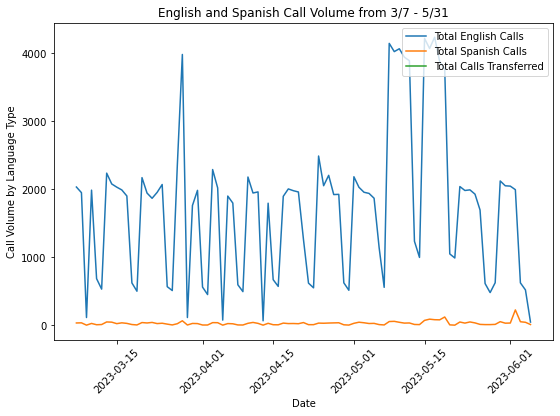

In [20]:
## Plot English and Spanish Language usage overlayed
fig, axes = plt.subplots(figsize = (8, 6))

# Plotting the first subplot
line1, = axes.plot(filtered_data['date'], filtered_data['total_english_calls'], label='Total English Calls')
line2, = axes.plot(filtered_data['date'], filtered_data['total_spanish_calls'], label='Total Spanish Calls') 

axes.set_xlabel('Date')
axes.set_ylabel('Call Volume by Language Type')
axes.set_title('English and Spanish Call Volume from 3/7 - 5/31')

# Adjusting the x-axis tick labels
plt.setp(axes.xaxis.get_majorticklabels(), rotation=45)

# Add legend
axes.legend(handles=[line1, line2, line3], loc='upper right')

# Adjusting the spacing between subplots
plt.tight_layout(pad=1.5)

# Displaying the plots
plt.show()

In [ ]:
# Create table with the largest call handling since start of pilot.

# Sort the filtered_data DataFrame by col in descending order and get the top 5 values
top_col1_values = filtered_data.nlargest(5, 'total_internal_calls')
top_col2_values = filtered_data.nlargest(5, 'total_external_calls')
top_col3_values = filtered_data.nlargest(5, 'total_calls_transfered')

# Create the output table
output_table = pd.DataFrame({'Top 5 Peak Values (total_internal_calls)': top_col1_values['total_internal_calls'].values,
                            'Top 5 Peak Values (total_external_calls)': top_col2_values['total_external_calls'].values,
                            'Top 5 Peak Values (total_calls_transferred)': top_col3_values['total_calls_transfered'].values},
                           index=top_col1_values['date'])

# Display the output table
print(output_table)